<a href="https://colab.research.google.com/github/Trojans42/House-Prices/blob/master/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files #Upload Files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
Saving test.csv to test.csv
User uploaded file "train.csv" with length 460676 bytes
User uploaded file "test.csv" with length 451405 bytes


In [0]:
import io
import pandas as pd

df_train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
print(df_train.head())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


In [0]:
df_test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))
print(df_test.head())

     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]


In [0]:
missing_count = (df_train.isnull().sum() / len(df_train)) * 100

missing_count = missing_count[missing_count > 0]

print(missing_count.sort_values())

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


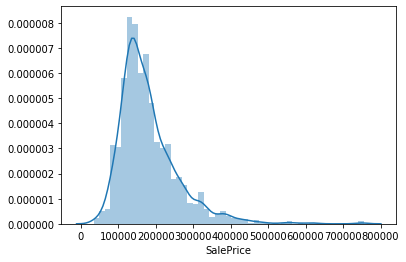

In [0]:
import seaborn as sns
sns.distplot(df_train['SalePrice'])

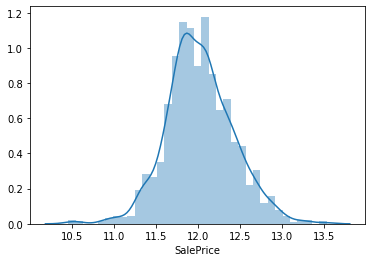

In [0]:
import numpy as np

target = np.log(df_train['SalePrice'])

sns.distplot(target)

In [0]:
numeric_data = df_train.select_dtypes(include = [np.number])

categorial_data = df_train.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the training data'.\
      format(numeric_data.shape[1], categorial_data.shape[1]))

There are 38 numerical and 43 categorical features in the training data


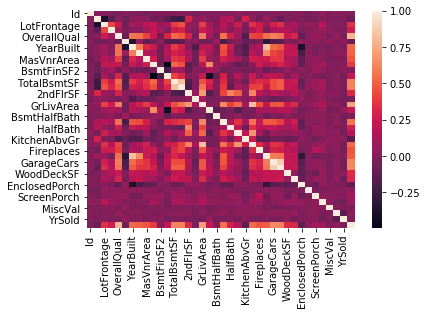

In [0]:
corr = numeric_data.corr()

sns.heatmap(corr)

In [0]:
del numeric_data['Id']

numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [0]:
from google.colab import files #Import files from Colab

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

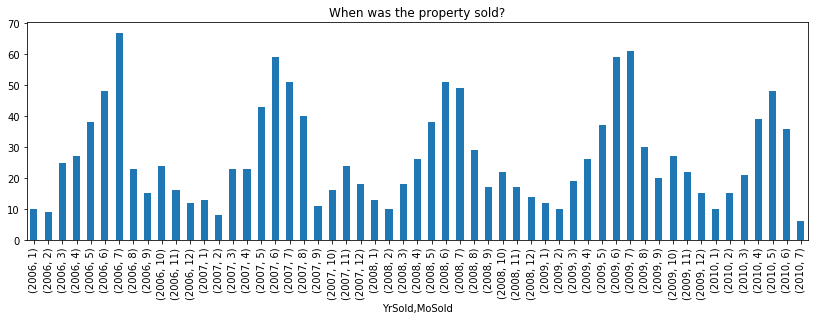

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

df_train.groupby(['YrSold', 'MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When was the property sold?')
plt.show()

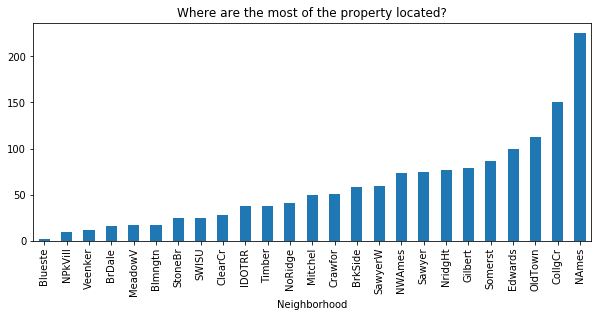

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

df_train.groupby('Neighborhood').Id.count().sort_values().plot(kind='bar', figsize=(10,4))
plt.title('Where are the most of the property located?')
plt.show()

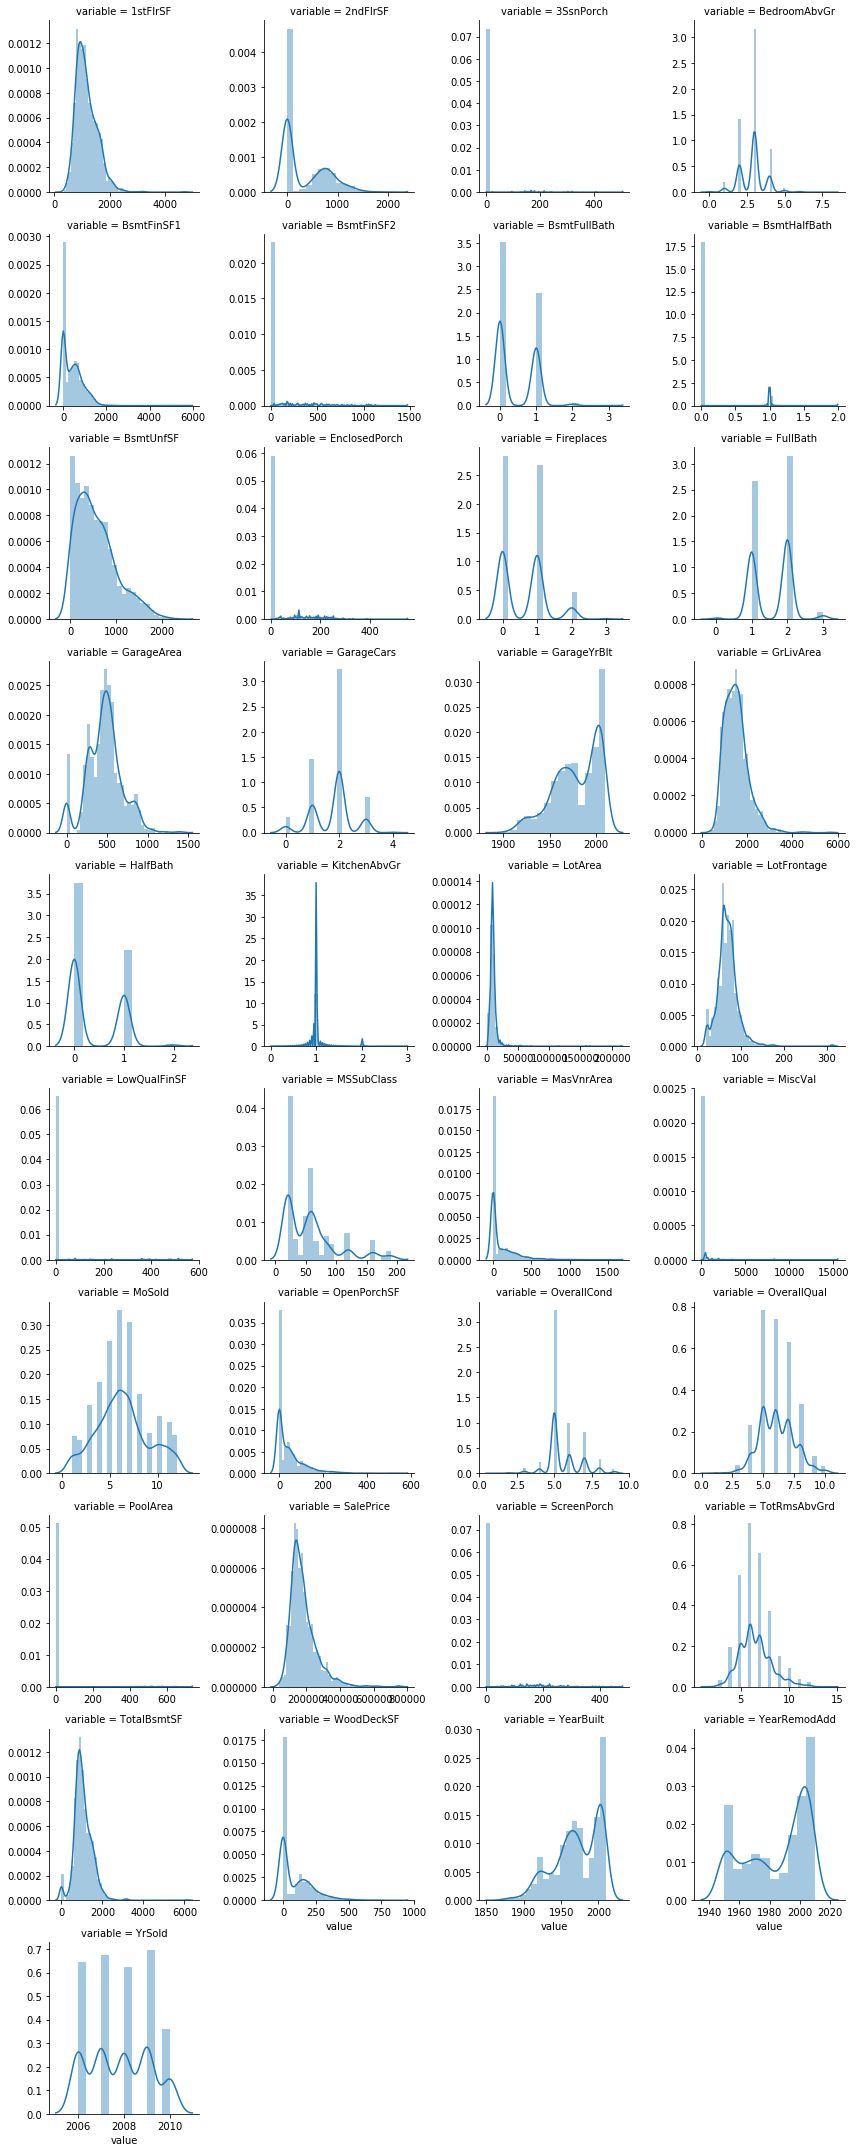

In [0]:
f = pd.melt(df_train, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [0]:
df_train['MSSubClass'] = df_train.MSSubClass.apply(lambda x: str(x))
df_train['MoSold'] = 